In [300]:
# No.1
# ライブラリのインポート
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

# Jupyter Notebookの中でインライン表示する場合の設定（これが無いと別ウィンドウでグラフが開く）
%matplotlib inline 

In [301]:
data = pd.read_csv("train.csv")
data.head(5) #データの観察を行う

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [302]:
# データ数の確認
print(data.shape)

(1460, 81)


In [303]:
# 変数の確認
# len(data.columns)
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [304]:
data["SalePrice"].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


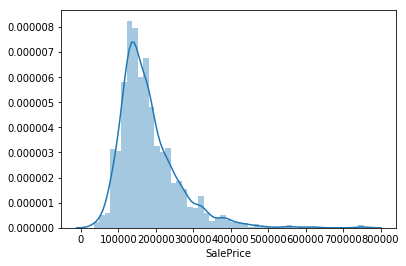

In [305]:
sns.distplot(data["SalePrice"])
plt.show()

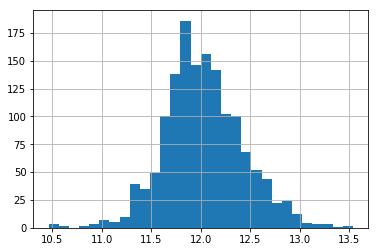

In [306]:
data["SalePrice"] = np.log1p(data["SalePrice"])
#対数変換後の分布を確認
data["SalePrice"].hist(bins=30)

In [307]:
#欠損値の多いものは削除
data = data.drop(columns=["YearRemodAdd","PoolQC","MiscFeature","Alley","Fence" ,"FireplaceQu" ,"LotFrontage","LotFrontage"])

In [308]:
#One Hot Encoding
data = pd.get_dummies(data)

In [309]:
data=data.fillna(data.mean())

In [310]:
data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [311]:
def outlier_iqr(df):

    for i in range(len(df.columns)):

        # 列を抽出する
        col = df.iloc[:,i]

        # 四分位数
        q1 = col.describe()['25%']
        q3 = col.describe()['75%']
        iqr = q3 - q1 #四分位範囲

        # 外れ値の基準点
        outlier_min = q1 - (iqr) * 2
        outlier_max = q3 + (iqr) * 2

        # 範囲から外れている値を除く
        col[col < outlier_min] = None
        col[col > outlier_max] = None

    return df

In [312]:
data.isnull().sum()[data.isnull().sum()>0].sort_values(ascending=False)

Series([], dtype: int64)

In [313]:
data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [314]:
X = data.loc[:,['1stFlrSF','GarageArea',"LotArea",'OverallQual','GrLivArea','TotalBsmtSF',"YearBuilt"]]
y = data.loc[:, ['SalePrice']]

In [315]:
c = pd.concat([X,y],axis =1)

In [316]:
c = outlier_iqr(c)

C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [317]:
c = c.dropna(how='any', axis=0)

In [318]:
c.head()

,1stFlrSF,GarageArea,LotArea,OverallQual,GrLivArea,TotalBsmtSF,YearBuilt,SalePrice
0,856.0,548.0,8450.0,7,1710.0,856.0,2003,12.247699
1,1262.0,460.0,9600.0,6,1262.0,1262.0,1976,12.109016
2,920.0,608.0,11250.0,7,1786.0,920.0,2001,12.317171
3,961.0,642.0,9550.0,7,1717.0,756.0,1915,11.849405
4,1145.0,836.0,14260.0,8,2198.0,1145.0,2000,12.429220


In [319]:
X = c.loc[:,['1stFlrSF','GarageArea',"LotArea",'OverallQual','GrLivArea','TotalBsmtSF',"YearBuilt"]]
y = c.loc[:, ['SalePrice']]


In [320]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) # trainと　testデータを分割

In [321]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [322]:
reg = Lasso(alpha=0.0004)
reg.fit(X_train, y_train)

Lasso(alpha=0.0004, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [323]:
y_pred = reg.predict(X_test)

In [324]:
print("ラッソ回帰でのRMSE:",np.sqrt(mean_squared_error(y_pred, y_test)))
print("ラッソ回帰でのRMSE:",reg.score(y_pred, y_test))

ラッソ回帰でのRMSE: 0.13355390360679556


ValueError: Expected 2D array, got 1D array instead:
array=[12.20303336 11.96323731 11.35760841 12.28010617 12.05778026 12.51425871
 12.14087476 11.59386388 12.13999144 11.78745497 11.66172477 11.95787272
 11.65647427 12.1938727  12.15804552 12.63030377 11.73702704 12.02763038
 12.58620268 12.67061962 11.90953279 12.19147477 12.02626183 11.98909325
 11.54757819 12.04112371 12.4557523  12.66740168 11.77568332 11.94970616
 11.87679886 11.99695549 11.83781372 11.78224339 12.47810167 11.84447935
 11.86395182 11.84605408 11.81156828 11.92104157 12.00282106 12.55893687
 12.05884323 12.11690261 11.65597712 12.01398007 12.24549471 12.02895535
 11.83468212 12.57987111 11.59584904 12.29775889 12.63323435 11.92542975
 12.16186049 11.47906918 11.56207056 11.53660043 11.43724267 11.52912178
 11.77046245 12.07658453 11.92362534 11.85317668 12.29305187 11.5956639
 12.28096945 11.76741091 12.36858504 12.15636129 11.31709063 11.96268045
 12.33820797 11.51746623 12.50458925 11.66543377 12.26614332 11.6576545
 11.39933011 11.91368149 11.94545359 11.71699723 11.73386487 11.36616966
 11.90080476 11.96278667 12.00917534 12.44479156 12.22487594 11.93000862
 11.98207505 12.30467585 11.8136847  11.80888984 12.59356317 12.15668088
 11.7232979  12.26123209 12.30198495 11.94213514 12.5193723  12.16225981
 12.24635774 12.59809172 12.05379496 12.11070111 11.56873808 12.06060659
 12.55068184 11.65749097 12.55228048 11.78014594 11.78926142 12.82613153
 11.64993081 11.64740849 11.98123711 11.65437466 11.76965042 12.33757927
 12.37863437 11.78789853 11.76588758 12.18391764 11.83197837 11.53709667
 12.14602658 12.5202034  11.93418215 11.99689636 11.97446307 12.06399586
 11.81299468 11.47222491 12.14799079 12.01480075 12.71168301 12.0646656
 11.83179781 11.83896413 11.81365053 12.51793517 11.35120244 11.71557275
 12.37977147 11.94415168 11.75001741 12.22560827 12.0004226  11.92725074
 11.73081154 11.6805942  12.52890109 12.7793449  11.81636038 12.09897148
 12.02408323 12.21389    11.75135633 11.80809438 11.45519268 12.3049078
 12.4935151  12.19529573 11.90653878 12.01943267 11.95904557 12.18549301
 12.68214579 12.10943589 11.94528147 12.13372485 11.94455407 11.81494085
 11.65451967 11.96181842 11.51269526 12.71818313 11.73922122 12.26834624
 12.29890418 11.71567633 12.68945433 11.69894603 11.63779475 11.92680268
 12.21134261 12.30238406 12.0062843  12.65445554 11.64001329 11.85086746
 11.7721322  12.15450435 11.55944985 11.95124211 11.86204841 12.39617496
 12.91609666 11.83745185 11.82782039 11.9501379  12.05459739 11.96671394
 11.99998343 11.9909254  11.97625403 11.94791972 11.93721738 12.20063484
 11.4977598  12.35100523 12.53729949 12.07336615 12.09716778 11.87843975
 12.52576247 12.53558695 11.856867   11.89399569 11.85865163 12.3365258
 11.63648077 12.98979905 12.00417543 11.97077965 12.18972459 12.14570666
 12.14278406 12.32221608 12.53977283 11.95329553 12.01606773 11.79411511
 12.1847622  11.59611963 12.07706996 11.74944849 12.14274496 12.23494131
 11.98521906 11.68666766 12.15736833 11.60045973 12.70063531 11.97404406
 11.28321334 12.02238834 11.5475496  11.27368313 12.59834525 11.97571356
 11.98409896 12.15038072 11.35700768 12.95435251 12.08024361 12.54601878
 11.63040957 12.16615477 11.60392582 11.79396656 12.67925149 12.05413357
 11.94748451 12.4644569  11.36222329 11.75532012 11.9754295  12.52326898
 11.77582907 12.1227486  11.68972819 12.32226357 12.44023927 12.07702814
 12.73522158 11.7627465  11.89786343 11.30329432 11.95407334 11.69008085
 11.52377999 11.69913224 11.67958278 11.57814444 12.67461188 12.48125763
 11.62910983 12.09805903 12.36910339 12.4171208  12.62226641 12.07188689
 11.46823729 11.81335996 11.85522591 12.05498856 12.21455335 11.89950303
 12.31817648 11.94359965 12.72993489 12.56343504 12.01498282 11.73898693
 12.01583379 12.09788995 11.87686056 12.41983355 11.74090408 11.65597712
 12.18138269 11.72336132 12.14522625 11.87745285 11.88229739 11.86625935
 11.47932043 12.74705884 11.83210481 12.06394729 12.2425212  12.29053725
 12.23863864 12.47566423 11.8540036  11.78447543 11.87939144 11.78788163
 11.6934114  11.24258782 12.10910435 11.65474749 11.61999766 12.51226949
 11.72905072 12.2878407  11.7248418  12.01598934 11.60776456 11.89894521
 12.29131025 12.21863277 11.86206527 12.30507366 11.48708913 12.27205798
 12.29861655 12.6324713  11.66603666 12.68501333 11.83468212 11.6877984
 11.57193428 12.02749882 12.31546098 12.04220319 11.87131803 11.94360336
 12.1861687  11.4429258  12.1785638  12.10302558 12.1658809  12.48911289
 11.76101174 12.3688096  11.82317051 11.79409531 11.9870499  12.2236177
 11.99776598 11.68120993 12.43736566 12.00630734 11.38212173 11.68762003
 12.28175209 11.91350038 12.08685123 11.82057633 12.06936718 12.1806656
 12.17854005 11.55334742 11.87755115 12.60224931 11.94509819 12.91895869
 11.94446397 11.79067672 11.62453316 12.0707428  12.25239125 11.4965629
 12.14598779 12.44156837 12.24641126 12.29748746 12.14087476 11.91979921
 12.28811832 12.72357367 11.82604682 12.28073761 12.31213853 12.06399564
 12.67223304 12.10830266 12.17809482 12.17423511 11.45933613 11.4728301 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [276]:
# 必要なライブラリのインポート
from sklearn.ensemble import RandomForestRegressor
# モデル構築、パラメータはデフォルト
forest = RandomForestRegressor(max_depth=100)
forest.fit(X_train, y_train)

C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [277]:
print(np.sqrt(mean_squared_error(forest.predict(X_test), y_test)))

0.14690689122864492


In [278]:
# 基本統計量をもう一度確認
data.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,103.685262,443.639726,46.549315,567.240411,...,0.003425,0.083562,0.002055,0.867808,0.069178,0.002740,0.008219,0.013699,0.820548,0.085616
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,180.569112,456.098091,161.319273,441.866955,...,0.058440,0.276824,0.045299,0.338815,0.253844,0.052289,0.090317,0.116277,0.383862,0.279893
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,164.250000,712.250000,0.000000,808.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [283]:
df_test = pd.read_csv("test.csv")

In [284]:
df_test=df_test.fillna(df_test.mean())

In [285]:
test_X = df_test.loc[:,['1stFlrSF','GarageArea',"LotArea",'OverallQual','GrLivArea','TotalBsmtSF',"YearBuilt"]].values

In [289]:
df_test["SalePrice"]=reg.predict(test_X)

In [290]:
df_test[["Id","SalePrice"]].head()

,Id,SalePrice
0,1461,11.783911
1,1462,12.002918
2,1463,12.062192
3,1464,12.102020
4,1465,12.190842


In [291]:
df_test[["Id","SalePrice"]].to_csv("submission3.csv",index=False)